In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"D:\DA projects\blinkit_archive\blinkit_orders.csv")
df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [13]:
# checking the shape of the dataframe.
df.shape

(5000, 10)

In [14]:
# checking data types and nulls.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB


In [ ]:
# This is secure way of transforming date-time columns. always use format = '%Y-%m-%d %H:%M:%S'

df['order_date'] = pd.to_datetime(df['order_date'], format = '%Y-%m-%d %H:%M:%S')
df['promised_delivery_time'] = pd.to_datetime(df['promised_delivery_time'], format = '%Y-%m-%d %H:%M:%S')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], format = '%Y-%m-%d %H:%M:%S')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 390.8+ KB


In [34]:
# delivery gap in minutes.
df['delivery_gap_in_minutes'] = (df['actual_delivery_time'] - df['order_date']).dt.total_seconds() / 60

# timing gap between promised timing and actual delivery time in minutes.
df['gap_between_promised_actual_time'] = (df['promised_delivery_time'] - df['actual_delivery_time']).dt.total_seconds() / 60

In [35]:
df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id,delivery_gap_in_minutes,gap_between_promised_actual_time
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771,13.0,5.0
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534,13.0,-2.0
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886,22.0,-4.0
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917,17.0,1.0
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741,18.0,-1.0


In [68]:
print(df['delivery_gap_in_minutes'].min())
print(df['delivery_gap_in_minutes'].max())

5.0
50.0


In [ ]:
# actual_delivery_time & order_time, min difference -> 5 and max difference -> 50

# categorizational operations in ranges.
# if delivery_gap between < 10, on time.
# if delivery_gap between 10 and 20, slightly late.
# if delivery_gap between 20 and 40, very late.
# if delivery_gap > 40, concerningly late.

# using np.select() method in pandas.
conditions = [
    df['delivery_gap_in_minutes'] < 10,
    (df['delivery_gap_in_minutes'] >= 10) & (df['delivery_gap_in_minutes'] < 20),
    (df['delivery_gap_in_minutes'] >= 20) & (df['delivery_gap_in_minutes'] <40),
    df['delivery_gap_in_minutes'] > 40
]

select = ["on time", "slightly late", "very late", "concerningly late"]

df['delivery_gap_flag'] = np.select(conditions, select, default="unknown timing")

In [70]:
df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,payment_method,delivery_partner_id,store_id,delivery_gap_in_minutes,gap_between_promised_actual_time,delivery_gap_flag
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,3197.07,Cash,63230,4771,13.0,5.0,slightly late
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,976.55,Cash,14983,7534,13.0,-2.0,slightly late
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,839.05,UPI,39859,9886,22.0,-4.0,very late
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,440.23,Card,61497,7917,17.0,1.0,slightly late
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,2526.68,Cash,84315,2741,18.0,-1.0,slightly late


In [73]:
# count of delivery types
df.groupby('delivery_gap_flag')['order_id'].count()

delivery_gap_flag
concerningly late     161
on time               432
slightly late        2541
unknown timing         30
very late            1836
Name: order_id, dtype: int64

In [74]:
# more feature engineering!
df['payment_method'] = df['payment_method'].str.lower()

df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_week'] = df['order_date'].dt.isocalendar().week
df['order_day'] = df['order_date'].dt.strftime('%a') # abbreviated day name ('wed', 'tue')
df['order_weekly_period'] = df['order_date'].dt.to_period('W')

In [75]:
df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,payment_method,delivery_partner_id,store_id,delivery_gap_in_minutes,gap_between_promised_actual_time,delivery_gap_flag,order_year,order_month,order_week,order_day,order_weekly_period
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,3197.07,cash,63230,4771,13.0,5.0,slightly late,2024,7,29,Wed,2024-07-15/2024-07-21
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,976.55,cash,14983,7534,13.0,-2.0,slightly late,2024,5,22,Tue,2024-05-27/2024-06-02
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,839.05,upi,39859,9886,22.0,-4.0,very late,2024,9,39,Mon,2024-09-23/2024-09-29
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,440.23,card,61497,7917,17.0,1.0,slightly late,2023,11,47,Fri,2023-11-20/2023-11-26
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,2526.68,cash,84315,2741,18.0,-1.0,slightly late,2023,11,47,Mon,2023-11-20/2023-11-26


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          5000 non-null   int64         
 1   customer_id                       5000 non-null   int64         
 2   order_date                        5000 non-null   datetime64[ns]
 3   promised_delivery_time            5000 non-null   datetime64[ns]
 4   actual_delivery_time              5000 non-null   datetime64[ns]
 5   order_total                       5000 non-null   float64       
 6   payment_method                    5000 non-null   object        
 7   delivery_partner_id               5000 non-null   int64         
 8   store_id                          5000 non-null   int64         
 9   delivery_gap_in_minutes           5000 non-null   float64       
 10  gap_between_promised_actual_time  5000 non-null 

In [77]:
df['payment_method'].unique()

array(['cash', 'upi', 'card', 'wallet'], dtype=object)

In [ ]:
# checking for duplicate values.
# df.duplicated(subset=['customer_id']).sum()

# no more duplicate values! this indicates that the order_id is the primary key of this dataset.
df.duplicated(subset=['order_id']).sum()

np.int64(0)

In [89]:
df.describe()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,delivery_partner_id,store_id,delivery_gap_in_minutes,gap_between_promised_actual_time,order_year,order_month,order_week
count,5.000000e+03,5.000000e+03,5000,5000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,5.029129e+09,5.009685e+07,2024-01-09 00:36:06.259200,2024-01-09 00:51:05.743200256,2024-01-09 00:55:32.323200,2201.86170,50050.318200,4999.689000,19.434400,-4.443000,2023.511200,6.643600,27.0616
min,6.046500e+04,3.181300e+04,2023-03-16 08:10:44,2023-03-16 08:27:44,2023-03-16 08:24:44,13.25000,43.000000,1.000000,5.000000,-30.000000,2023.000000,1.000000,1.0
25%,2.531421e+09,2.404314e+07,2023-08-17 01:54:09.249999872,2023-08-17 02:13:24.249999872,2023-08-17 02:27:24.249999872,1086.21500,24928.500000,2509.250000,13.000000,-8.000000,2023.000000,4.000000,16.0
50%,5.074378e+09,4.997808e+07,2024-01-07 11:35:32,2024-01-07 11:47:02,2024-01-07 11:51:02,2100.69000,50262.500000,4987.000000,18.000000,-2.000000,2024.000000,7.000000,27.0
75%,7.488579e+09,7.621215e+07,2024-06-03 20:53:15.750000128,2024-06-03 21:09:30.750000128,2024-06-03 21:09:30.750000128,3156.88250,74478.250000,7500.750000,24.000000,1.000000,2024.000000,9.000000,38.0
max,9.998298e+09,9.989390e+07,2024-11-04 20:29:15,2024-11-04 20:43:15,2024-11-04 20:47:15,6721.46000,99968.000000,9995.000000,50.000000,5.000000,2024.000000,12.000000,52.0
std,2.863533e+09,2.919082e+07,NaN,NaN,NaN,1303.02438,28802.276922,2886.089242,8.659486,8.063929,0.499925,3.058701,13.300631


In [94]:
df

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,payment_method,delivery_partner_id,store_id,delivery_gap_in_minutes,gap_between_promised_actual_time,delivery_gap_flag,order_year,order_month,order_week,order_day,order_weekly_period
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,3197.07,cash,63230,4771,13.0,5.0,slightly late,2024,7,29,Wed,2024-07-15/2024-07-21
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,976.55,cash,14983,7534,13.0,-2.0,slightly late,2024,5,22,Tue,2024-05-27/2024-06-02
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,839.05,upi,39859,9886,22.0,-4.0,very late,2024,9,39,Mon,2024-09-23/2024-09-29
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,440.23,card,61497,7917,17.0,1.0,slightly late,2023,11,47,Fri,2023-11-20/2023-11-26
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,2526.68,cash,84315,2741,18.0,-1.0,slightly late,2023,11,47,Mon,2023-11-20/2023-11-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,62600289,2023-12-25 15:46:20,2023-12-25 16:05:20,2023-12-25 16:10:20,1132.33,cash,90914,1587,24.0,-5.0,very late,2023,12,52,Mon,2023-12-25/2023-12-31
4996,8340761903,53640286,2023-11-27 09:18:43,2023-11-27 09:38:43,2023-11-27 09:36:43,2372.01,cash,27952,3458,18.0,2.0,slightly late,2023,11,48,Mon,2023-11-27/2023-12-03
4997,5936301790,87059497,2024-06-21 19:09:09,2024-06-21 19:23:09,2024-06-21 19:26:09,3158.35,cash,9590,7424,17.0,-3.0,slightly late,2024,6,25,Fri,2024-06-17/2024-06-23
4998,5710579377,67310893,2024-06-06 14:58:13,2024-06-06 15:12:13,2024-06-06 15:10:13,1918.92,upi,29940,6128,12.0,2.0,slightly late,2024,6,23,Thu,2024-06-03/2024-06-09


<Axes: title={'center': 'monthly average sales value'}, xlabel='order_month'>

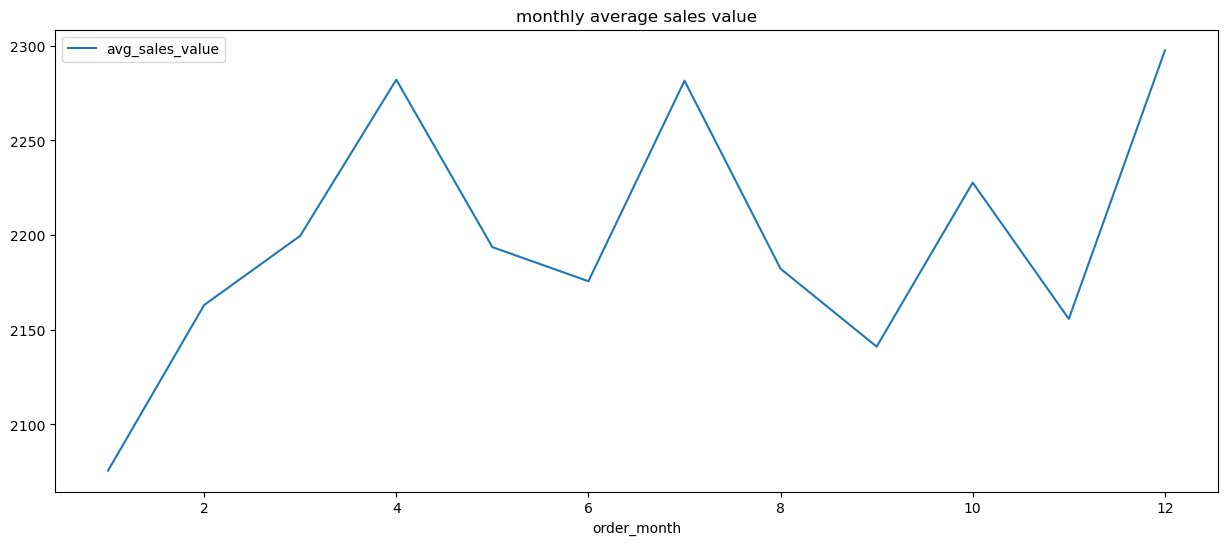

In [98]:
# finding monthly averages sales value.

monthly_avg = (
    df.groupby('order_month', as_index=False).agg
    (
        avg_sales_value = ('order_total', 'mean')
    )
)

monthly_avg.plot(x = 'order_month', y='avg_sales_value', kind = 'line', figsize=(15, 6), title='monthly average sales value')

In [1]:
df.groupby('order_year')['order_total'].sum().reset_index().sort_values(by = 'order_total', ascending=False).plot(x='order_year', y='order_total', kind = 'pie', title='total revenue for blinkit')

NameError: name 'df' is not defined

In [105]:
# save the correct csv.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   order_id                          5000 non-null   int64         
 1   customer_id                       5000 non-null   int64         
 2   order_date                        5000 non-null   datetime64[ns]
 3   promised_delivery_time            5000 non-null   datetime64[ns]
 4   actual_delivery_time              5000 non-null   datetime64[ns]
 5   order_total                       5000 non-null   float64       
 6   payment_method                    5000 non-null   object        
 7   delivery_partner_id               5000 non-null   int64         
 8   store_id                          5000 non-null   int64         
 9   delivery_gap_in_minutes           5000 non-null   float64       
 10  gap_between_promised_actual_time  5000 non-null 

In [106]:
df.shape

(5000, 17)

In [107]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_date                          0
promised_delivery_time              0
actual_delivery_time                0
order_total                         0
payment_method                      0
delivery_partner_id                 0
store_id                            0
delivery_gap_in_minutes             0
gap_between_promised_actual_time    0
delivery_gap_flag                   0
order_year                          0
order_month                         0
order_week                          0
order_day                           0
order_weekly_period                 0
dtype: int64

In [108]:
df.duplicated().sum()

np.int64(0)

In [110]:
df.to_csv(r"D:\DA projects\blinkit_archive\blinkit_orders_cleaned.csv", index = False)
print("csv file saved!")

csv file saved!


In [1]:
# opening the cleaned file to save it as a excel file for better data file frequency.
import pandas as pd
df = pd.read_csv(r"D:\DA projects\blinkit_archive\blinkit_orders_cleaned.csv")
df.to_excel(r"D:\DA projects\blinkit_archive\blinkit_orders_cleaned_xl.xlsx", index=False)
print("saved in xlsx format.")

saved in xlsx format.


In [1]:
import pandas as pd
df = pd.read_csv(r"D:\DA projects\blinkit_archive\blinkit_orders_cleaned.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   order_id                          5000 non-null   int64  
 1   customer_id                       5000 non-null   int64  
 2   order_date                        5000 non-null   object 
 3   promised_delivery_time            5000 non-null   object 
 4   actual_delivery_time              5000 non-null   object 
 5   order_total                       5000 non-null   float64
 6   payment_method                    5000 non-null   object 
 7   delivery_partner_id               5000 non-null   int64  
 8   store_id                          5000 non-null   int64  
 9   delivery_gap_in_minutes           5000 non-null   float64
 10  gap_between_promised_actual_time  5000 non-null   float64
 11  delivery_gap_flag                 5000 non-null   object 
 12  order_

In [2]:
# creating another column from order_date to extract order hours which will help us to hourly order analysis. 
df['order_date'] = pd.to_datetime(df['order_date'], format = '%Y-%m-%d %H:%M:%S')
df['order_hour'] = df['order_date'].dt.hour

df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,payment_method,delivery_partner_id,store_id,delivery_gap_in_minutes,gap_between_promised_actual_time,delivery_gap_flag,order_year,order_month,order_week,order_day,order_weekly_period,order_hour
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,3197.07,cash,63230,4771,13.0,5.0,slightly late,2024,7,29,Wed,2024-07-15/2024-07-21,8
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,976.55,cash,14983,7534,13.0,-2.0,slightly late,2024,5,22,Tue,2024-05-27/2024-06-02,13
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,839.05,upi,39859,9886,22.0,-4.0,very late,2024,9,39,Mon,2024-09-23/2024-09-29,13
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,440.23,card,61497,7917,17.0,1.0,slightly late,2023,11,47,Fri,2023-11-20/2023-11-26,16
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,2526.68,cash,84315,2741,18.0,-1.0,slightly late,2023,11,47,Mon,2023-11-20/2023-11-26,5


In [3]:
# save the csv in both csv and xlsx format.
df.to_csv(r"D:\DA projects\blinkit_archive\blinkit_orders_cleaned_final.csv", index=False)
print("saved as csv!")

saved as csv!


In [4]:
df.to_excel(r"D:\DA projects\blinkit_archive\blinkit_orders_cleaned_final_xlsx.xlsx", index=False)
print("saved as xlsx file!")

saved as xlsx file!
